In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망
  - 입력층 → 은닉층 → 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력이 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속

https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480

https://colah.github.io/posts/2015-08-Understanding-LSTMs/


- 입력 $X_t$에서 $t$는 시간을 뜻함
- 첫번째 입력인 $X_{0}$이 들어오면 첫 번째 기억 $A$가 만들어지고, 두 번째 입력인 $X_1$이 들어오면 기존 기억인 $A$를 참고하여 새로운 기억인 $A$를 생성
- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $X$를 출력 $h$로 변환하기 위한 가중치
- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치
- $h$: '상태'를 기억
- $h_t \ $는 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)


In [3]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)

print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


In [11]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 316ms/step - loss: 0.5936 - acc: 0.6827 - val_loss: 0.4967 - val_acc: 0.7626
Epoch 2/10
157/157 [==============================] - 51s 327ms/step - loss: 0.3871 - acc: 0.8411 - val_loss: 0.4236 - val_acc: 0.8268
Epoch 3/10
157/157 [==============================] - 52s 329ms/step - loss: 0.2761 - acc: 0.8927 - val_loss: 0.3288 - val_acc: 0.8648
Epoch 4/10
157/157 [==============================] - 51s 325ms/step - loss: 0.2216 - acc: 0.9176 - val_loss: 0.3483 - val_acc: 0.8570
Epoch 5/10
157/157 [==============================] - 52s 330ms/step - loss: 0.1698 - acc: 0.9375 - val_loss: 0.3525 - val_acc: 0.8596
Epoch 6/10
157/157 [==============================] - 50s 319ms/step - loss: 0.1289 - acc: 0.9531 - val_loss: 0.3957 - val_acc: 0.8502
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 0.0894 - acc: 0.9687 - val_loss: 0.4242 - val_acc: 0.8556
Epoch 8/10
157/157 [==============================] - 5

In [13]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


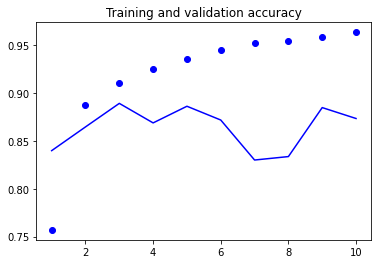

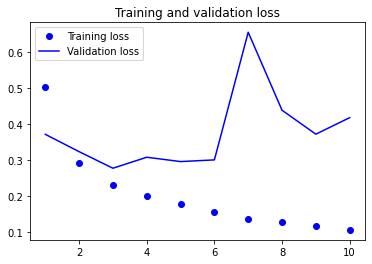

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 케라스를 사용한 LSTM 예제

이제 실제적인 관심사로 이동해 보죠. LSTM 층으로 모델을 구성하고 IMDB 데이터에서 훈련해 보겠습니다(그림 6-16과 6-17 참조). 이 네트워크는 조금 전 `SimpleRNN`을 사용했던 모델과 비슷합니다. LSTM 층은 출력 차원만 지정하고 다른 (많은) 매개변수는 케라스의 기본값으로 남겨 두었습니다. 케라스는 좋은 기본값을 가지고 있어서 직접 매개변수를 튜닝하는 데 시간을 쓰지 않고도 거의 항상 어느정도 작동하는 모델을 얻을 수 있습니다.

- SimpleRNN은 긴 시간에 걸친 의존성은 학습할 수 없다.
- 그래디언트 소실 문제가 발생하기 때문이다.
- LSTM(Long Short-Term Memory) 알고리즘은 정보를 여러 타임스텝에 걸처 나르는 방법을 추가하여 시퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위로 올라가 필요한 시점의 타임스탭으로 이동하여 떨군다.
- 개념적으로 데이터를 실어 나르는 이 흐름이 다음 출력과 상태를 조절한다.


In [12]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 24ms/step - loss: 0.5017 - acc: 0.7570 - val_loss: 0.3713 - val_acc: 0.8398
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2906 - acc: 0.8880 - val_loss: 0.3233 - val_acc: 0.8646
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2304 - acc: 0.9103 - val_loss: 0.2774 - val_acc: 0.8892
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.2009 - acc: 0.9253 - val_loss: 0.3078 - val_acc: 0.8688
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1778 - acc: 0.9355 - val_loss: 0.2958 - val_acc: 0.8862
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1550 - acc: 0.9455 - val_loss: 0.3005 - val_acc: 0.8718
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.1378 - acc: 0.9521 - val_loss: 0.6542 - val_acc: 0.8300
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - 

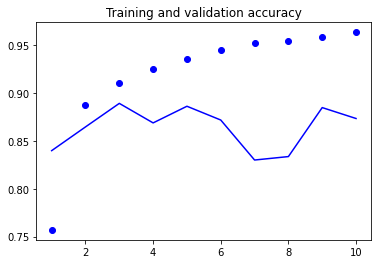

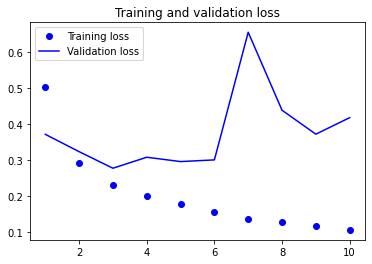

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 88% 정도의 검증 정확도 달성. 하이퍼 파라미터 튜닝 및 규제를 통하여 성능 개선 필요
- IMDB 감정분석와 같은 문제 보다는 훨씬 더 복잡한 자연어 처리 문제들 특히 질의-응답, 기계 번역 분야에서 뛰어난 능력을 발휘할 수 있다.

### 순환 신경망의 고급 사용법

#### 기온 예측 문제
이 데이터는 독일 예나 시에 있는 막스 플랑크 생물지구화학 연구소( http://www.bgc-jena.mpg.de/wetter/ )의 지상 관측소에서 수집한 것입니다.

이 데이터셋에는 수년간에 걸쳐 (기온, 기압, 습도, 풍향 등과 같은) 14개의 관측치가 10분마다 기록되어 있습니다. 원본 데이터는 2003년부터 기록되어 있지만 이 예제에서는 2009~2016년 사이의 데이터만 사용합니다. 

이 데이터셋은 시계열 수치 데이터를 다루는 법을 익히는 데 안성맞춤입니다. 최근 데이터(몇 일치 데이터 포인트)를 입력으로 사용해 모델을 만들고 24시간 이후의 기온을 예측


In [24]:
import os

data_dir = '/content/drive/MyDrive/cakd7/강의/m9_딥러닝기본/jena_climate'
fname = os.path.join(data_dir,'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))
print(lines[0])

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30


In [19]:
len(header)

15

In [20]:
import numpy as np

float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i,:] = values

In [23]:
print(float_data.shape)
print(float_data[0,:])

(420551, 14)
[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


In [25]:
float_data[:,1]

array([-8.02, -8.41, -8.51, ..., -3.16, -4.23, -4.82])

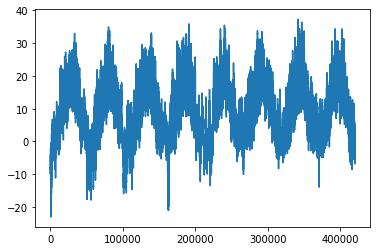

In [26]:
import matplotlib.pyplot as plt 

temp = float_data[:,1]
plt.plot(range(len(temp)), temp)
plt.show()

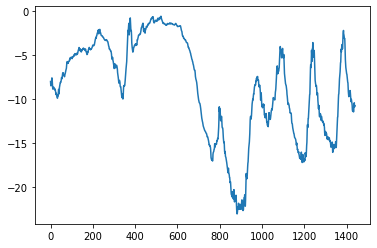

In [27]:
# 처음 10일단의 온도 데이터 그래프

plt.plot(range(1440), temp[:1440])
plt.show()

## Preparing the data

이 문제의 정확한 정의는 다음과 같습니다. `lookback` 타임스텝(하나의 타임스텝은 10분입니다)만큼 이전으로 돌아가서 매 `steps` 타임스텝마다 샘플링합니다. 이 데이터를 바탕으로 `delay` 타임스텝 이후의 온도를 예측할 수 있을까요? 사용할 변수는 다음과 같습니다.

* `lookback = 1440` : 10일 전 데이터로 돌아갑니다.
* `steps = 6` : 한 시간마다 데이터 포인트 하나를 샘플링합니다.
* `delay = 144` : 24시간이 지난 데이터가 타깃이 됩니다.

시작하기 전에 두 가지 작업을 처리해야 합니다:

* 신경망에 주입할 수 있는 형태로 데이터를 전처리합니다. 데이터가 이미 수치형이므로 추가적인 벡터화가 필요하지 않습니다. 하지만 데이터에 있는 각 시계열 특성의 범위가 서로 다릅니다(예를 들어 온도는 일반적으로 -20도에서 +30도 사이이고, 밀리바(mb)로 측정된 기압은 1,000 근처의 값입니다). 각 시계열 특성을 개별적으로 정규화하여 비슷한 범위를 가진 작은 값으로 바꾸겠습니다.
* float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터를 만듭니다. 이 데이터셋에 있는 샘플은 중복이 많습니다(샘플 `N`과 샘플 `N + 1`은 대부분 타임스텝이 비슷합니다). 모든 샘플을 각기 메모리에 적재하는 것은 낭비가 심하므로 대신에 원본 데이터를 사용해 그때 그때 배치를 만들겠습니다.

각 시계열 특성에 대해 평균을 빼고 표준 편차로 나누어 전처리합니다. 처음 200,000개 타임스텝을 훈련 데이터로 사용할 것이므로 전체 데이터에서 200,000개만 사용하여 평균과 표준 편차를 계산합니다:


In [28]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

여기서 사용할 제너레이터입니다. 이 제너레이터 함수는 `(samples, targets)` 튜플을 반복적으로 반환합니다. `samples`는 입력 데이터로 사용할 배치이고 `targets`은 이에 대응되는 타깃 온도의 배열입니다. 이 제너레이터 함수는 다음과 같은 매개변수가 있습니다:

* `data` : 코드 6-32에서 정규화한 부동 소수 데이터로 이루어진 원본 배열
* `lookback` : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
* `delay` : 타깃으로 사용할 미래의 타임스텝
* `min_index`와 `max_index` : 추출할 타임스텝의 범위를 지정하기 위한 `data` 배열의 인덱스. 검증 데이터와 테스트 데이터를 분리하는 데 사용합니다.
* `shuffle` : 샘플을 섞을지 시간 순서대로 추출할지 결정합니다.
* `batch_size` : 배치의 샘플 수
* `step` : 데이터를 샘플링할 타임스텝 간격. 한 시간에 하나의 데이터 포인트를 추출하기 위해 6으로 지정하겠습니다.
* steps_per_epoch * batch_size = 훈련 샘플 수


In [43]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
          min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j],step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets
    
      

In [44]:
# generator 함수를 사용해 훈련용, 검증용, 테스트용으로 생성

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback = lookback,
                    delay = delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback = lookback,
                     delay = delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size

test_steps = (len(float_data) - 300001 - lookback) // batch_size


In [45]:
# 상식 수준의 기준점 : 2.57C

from tensorflow.keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 10s 18ms/step - loss: 1.6245 - val_loss: 0.9257
Epoch 2/20
500/500 [==============================] - 9s 17ms/step - loss: 0.5643 - val_loss: 0.3766
Epoch 3/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3247 - val_loss: 0.3307
Epoch 4/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2770 - val_loss: 0.3056
Epoch 5/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2608 - val_loss: 0.3108
Epoch 6/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2485 - val_loss: 0.3081
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2414 - val_loss: 0.3529
Epoch 8/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2352 - val_loss: 0.3347
Epoch 9/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2297 - val_loss: 0.3305
Epoch 10/20
500/500 [==============================] - 9s 18ms/step - loss: 0.2256 - val_l

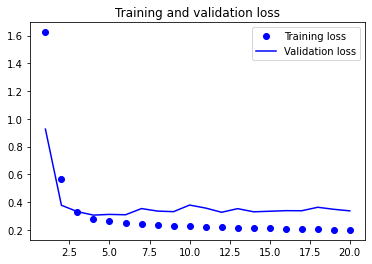

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이모델은 3C로 기준 모델 성능보다 저조함. 핵심 정보를 충분히 학습하지 못했기 때문임

In [48]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


500/500 [==============================] - 12s 21ms/step - loss: 0.3065 - val_loss: 0.2671
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2827 - val_loss: 0.2639
Epoch 3/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2764 - val_loss: 0.2627
Epoch 4/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2717 - val_loss: 0.2604
Epoch 5/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2659 - val_loss: 0.2672
Epoch 6/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2605 - val_loss: 0.2695
Epoch 7/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2573 - val_loss: 0.2671
Epoch 8/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2524 - val_loss: 0.2686
Epoch 9/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2469 - val_loss: 0.2727
Epoch 10/20
500/500 [==============================] - 10s 20ms/step - loss: 0.2441 - val_los

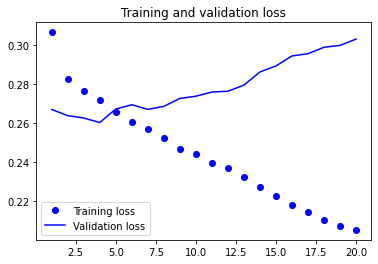

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

MAE는 0.265로 2.35C는 상식 기준 2.57C 보다 개선된 것을 알 수 있음 

### 과제_1116_1
과대 적합을 감소시키기 위하여 순환 드롭아웃를 적용하여 모델링 및 성능을 평가하세요.

### 과제_1116_2

상기 모델에 대하여 병목 문제를 추가로 해결하기 위하여 네트워크의 용량을 증가시켜 모델링 및 성능을 평가하세요.

### 과제_1116_3

- 온도 예측 문제에 시간의 반대 방향으로 입력 시퀀스를 처리하는 아래 사용자 함수를 이용하여 모델링 및 성능 평가를 수행하세요.

- 같은 기법을 IMDB 데이테셋에 적용하여 모델링 및 성능 평가를 수행하세요.

In [ ]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)
